In [1]:
import matplotlib.pyplot as plt
import numpy as py
import pandas as pd
%matplotlib inline

In [4]:
df=pd.read_csv("/content/drive/MyDrive/parkinsons_updrs.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/parkinsons_updrs.csv")

In [6]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [7]:
column_names=df.columns
print(column_names)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


In [9]:
from sklearn.preprocessing import StandardScaler

In [8]:
feature_columns = df.columns.difference(['total_UPDRS'])

In [10]:
scaler=StandardScaler()
scaler.fit(df[feature_columns])

StandardScaler()

In [11]:
scaled_data=scaler.transform(df[feature_columns])

In [12]:
scaled_data

array([[-1.47849968, -0.00920476,  0.08290524, ..., -0.68250887,
        -1.65659628, -1.63209025],
       [-1.24788006,  1.28264969, -0.56079341, ..., -0.68250887,
        -1.65659628, -1.5006763 ],
       [-1.5401393 ,  0.31871139, -0.23894409, ..., -0.68250887,
        -1.65659628, -1.36941017],
       ...,
       [-1.04885603,  0.78902751, -0.47366293, ..., -0.68250887,
         1.65754564,  1.19676305],
       [-1.26903782,  0.6391696 , -0.5945787 , ..., -0.68250887,
         1.65754564,  1.32606439],
       [-1.163249  ,  0.36812022, -0.59280052, ..., -0.68250887,
         1.65754564,  1.45704984]])

In [13]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA(n_components=2)

In [16]:
pca.fit(scaled_data)

PCA(n_components=2)

In [17]:
x_pca=pca.transform(scaled_data)

In [18]:
scaled_data.shape

(5875, 21)

In [19]:
x_pca.shape

(5875, 2)

In [20]:
scaled_data

array([[-1.47849968, -0.00920476,  0.08290524, ..., -0.68250887,
        -1.65659628, -1.63209025],
       [-1.24788006,  1.28264969, -0.56079341, ..., -0.68250887,
        -1.65659628, -1.5006763 ],
       [-1.5401393 ,  0.31871139, -0.23894409, ..., -0.68250887,
        -1.65659628, -1.36941017],
       ...,
       [-1.04885603,  0.78902751, -0.47366293, ..., -0.68250887,
         1.65754564,  1.19676305],
       [-1.26903782,  0.6391696 , -0.5945787 , ..., -0.68250887,
         1.65754564,  1.32606439],
       [-1.163249  ,  0.36812022, -0.59280052, ..., -0.68250887,
         1.65754564,  1.45704984]])

In [21]:
x_pca


array([[-1.00263957, -0.19693122],
       [-2.62234642, -0.7468195 ],
       [-1.96115519, -0.1654521 ],
       ...,
       [-1.70455254, -0.64060778],
       [-2.39437221, -0.19343974],
       [-1.96993311, -0.32143515]])

Text(0.5, 1.0, 'Scatter Plot of PCA Results')

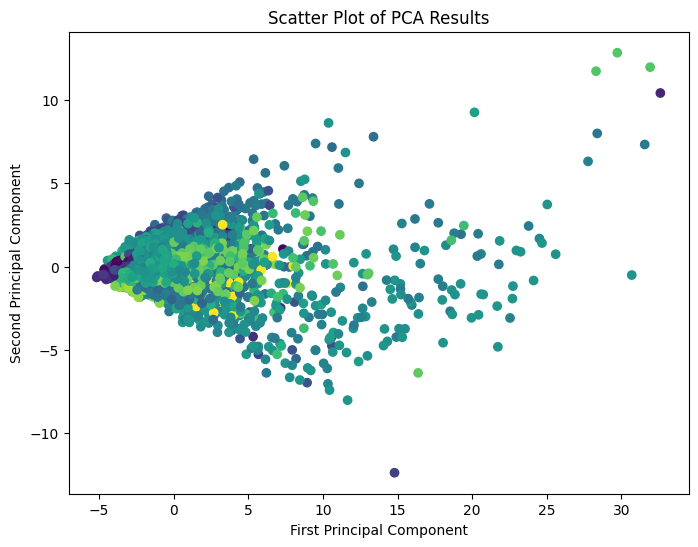

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df["total_UPDRS"], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of PCA Results')

In [23]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.53872098, 0.08327165])

In [24]:
import numpy as np
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.53872098, 0.62199263])

Text(0.5, 1.0, 'Explained Variance Ratio for Principal Components')

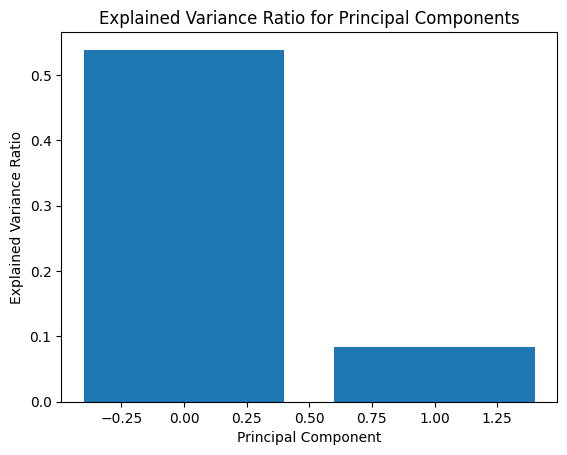

In [25]:
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')